In [1]:
import os
HOME=os.getcwd()
print(HOME)

/Users/sairam/Desktop/cell-segmentation-using-yolo-v8/research


In [2]:
%pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.163 🚀 Python-3.11.4 torch-2.0.1 CPU (Intel Core(TM) i5-8257U 1.40GHz)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 101.1/112.7 GB disk)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
root_path='/content/drive/MyDrive/yolov8-seg'

In [ ]:
%cd '/content/drive/MyDrive/yolov8-seg'

/content/drive/MyDrive/yolov8-seg


In [ ]:
!pwd

/content/drive/MyDrive/yolov8-seg


In [ ]:
!ls

 celldata   data.yaml  'yolov8 instance segmentation.ipynb'


In [ ]:


!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=50 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=F

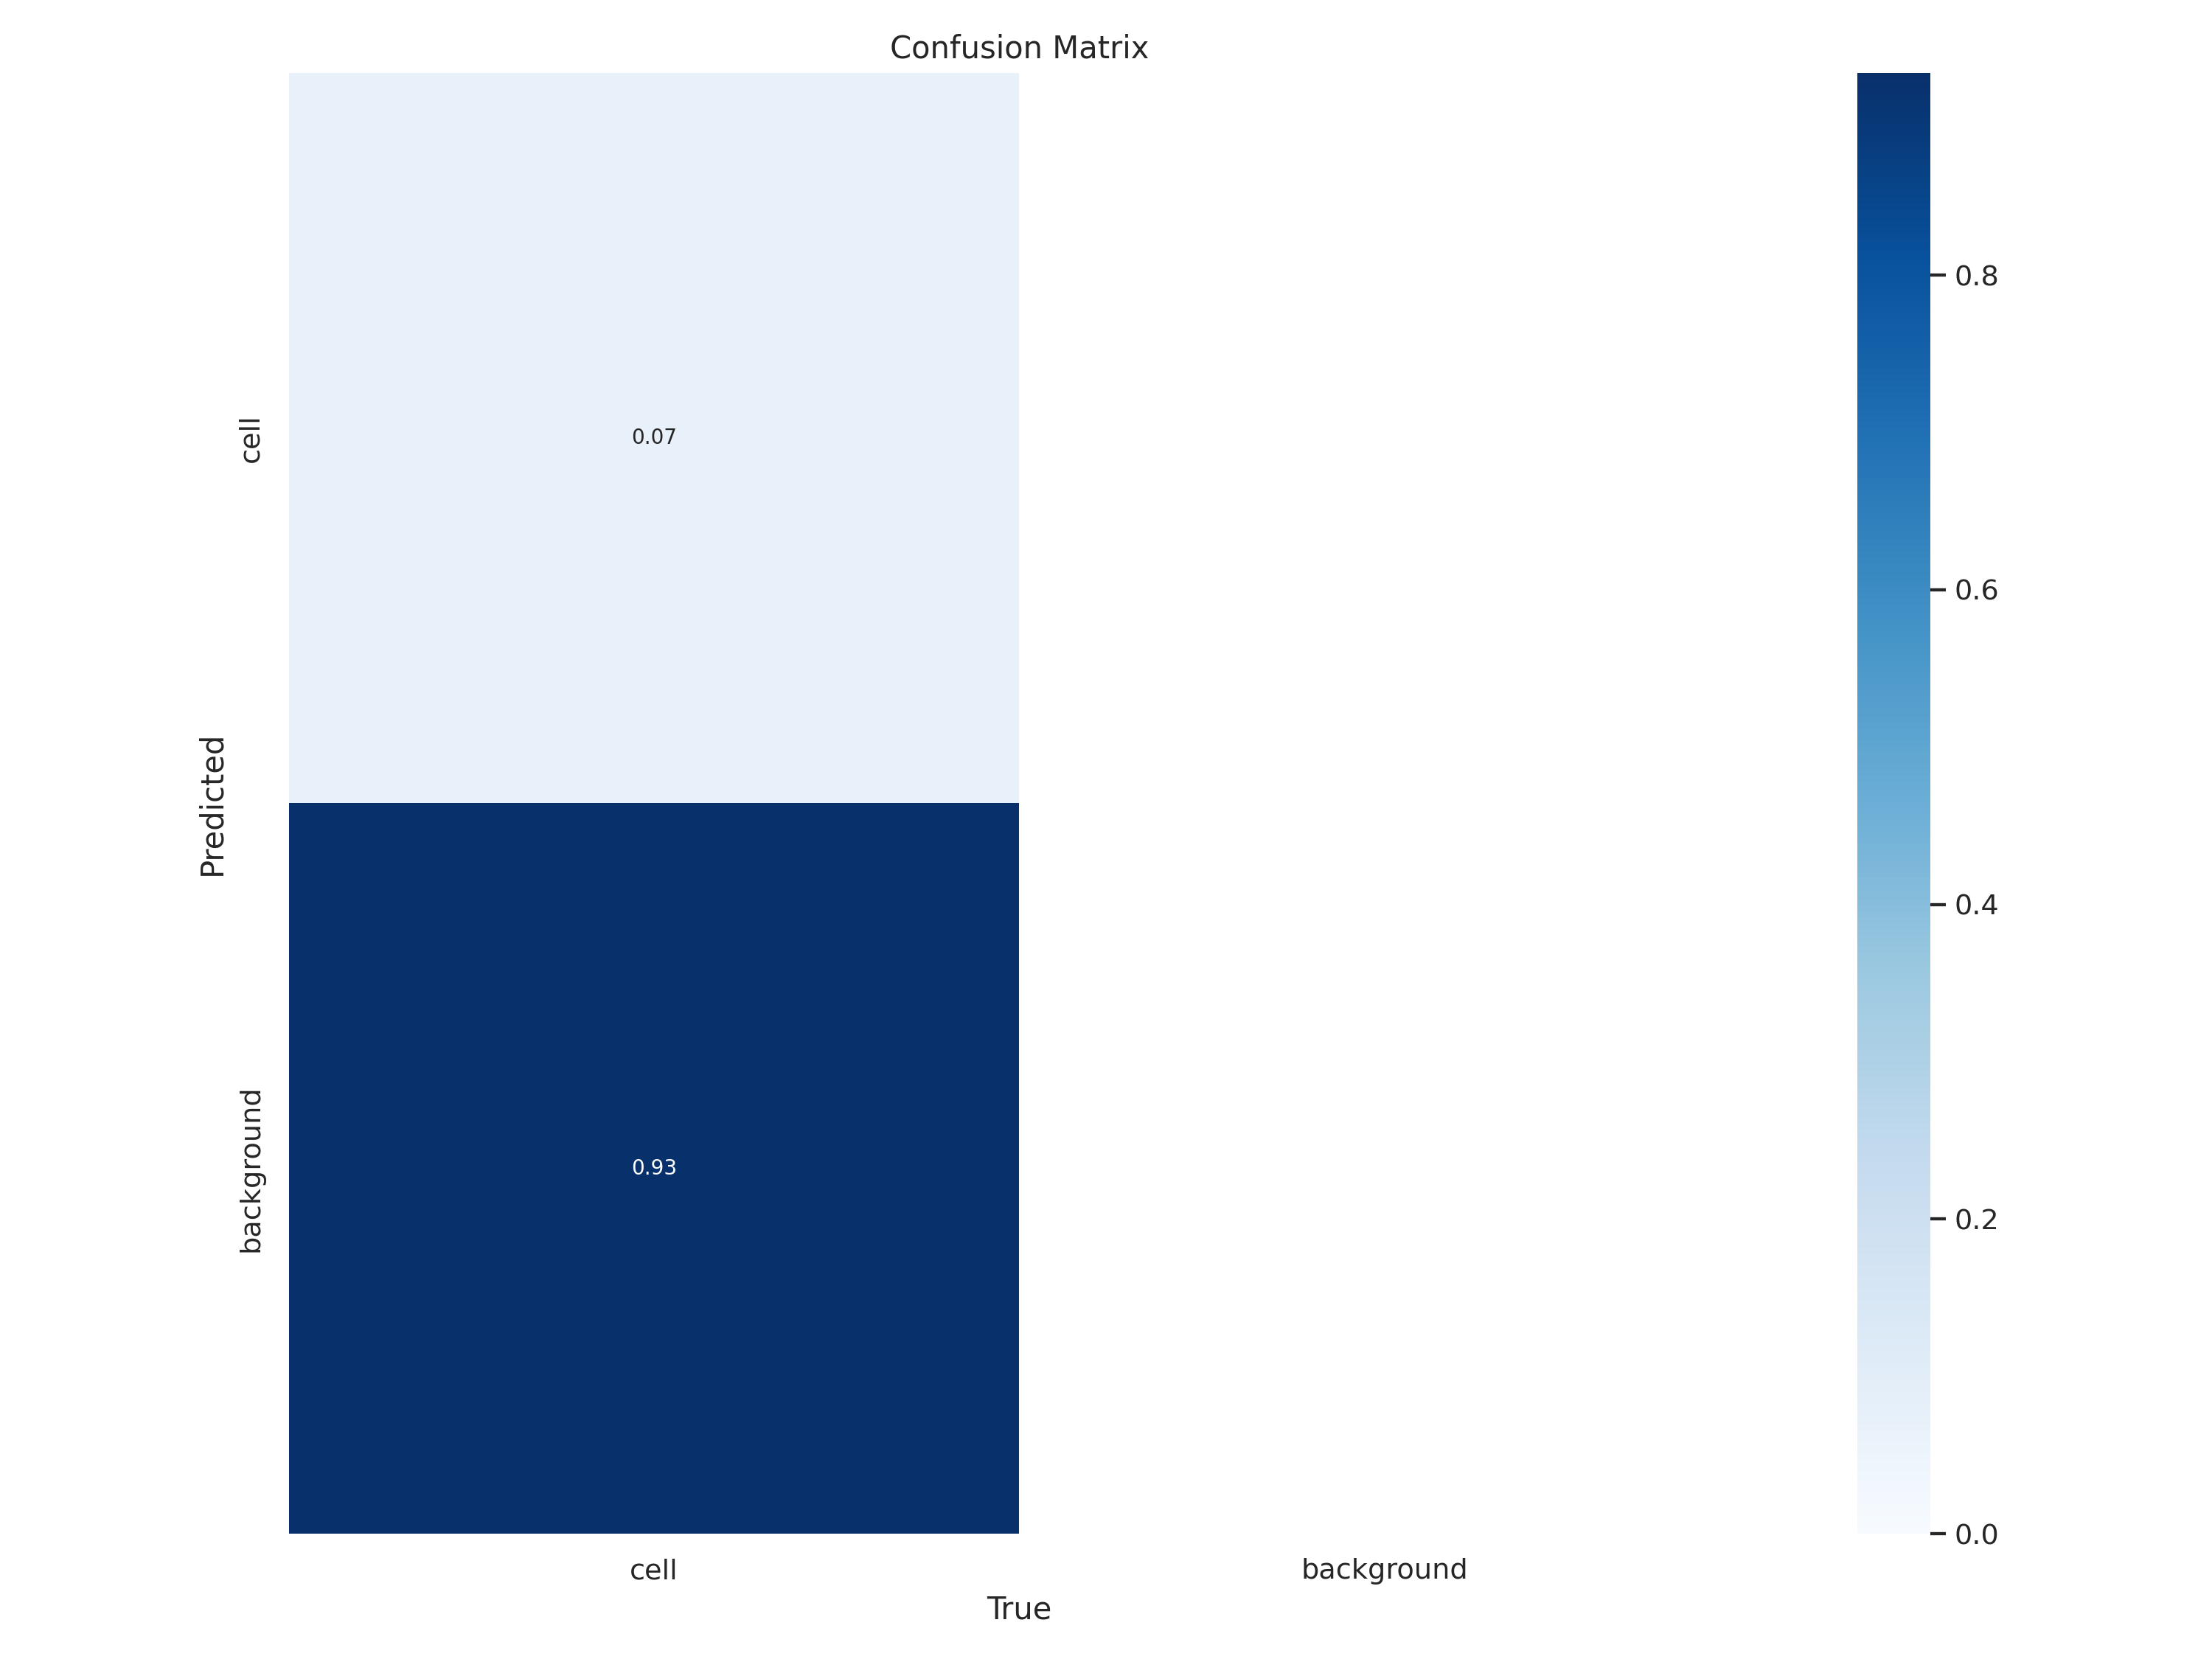

In [ ]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

In [ ]:

from IPython.display import display, Image

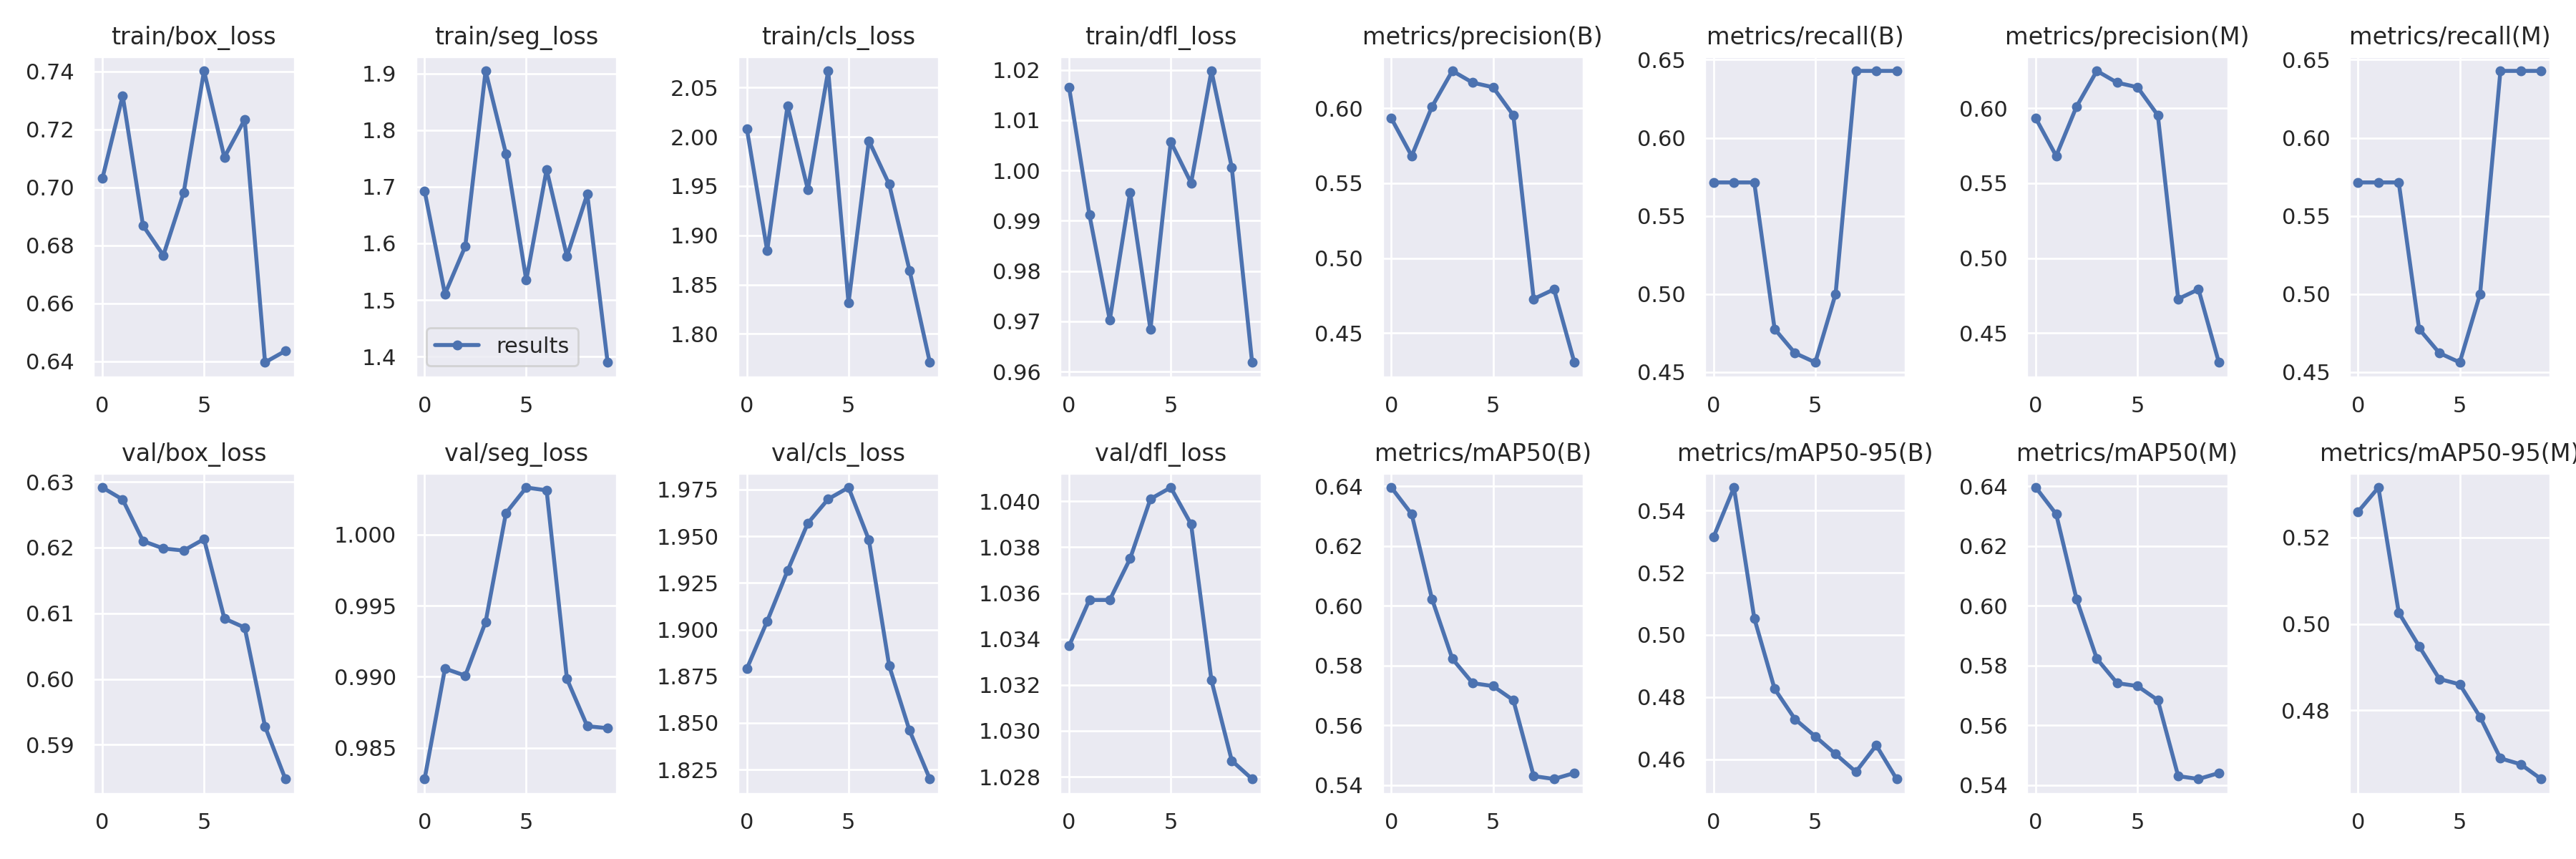

In [ ]:
Image(filename=f'runs/segment/train/results.png', width=600)

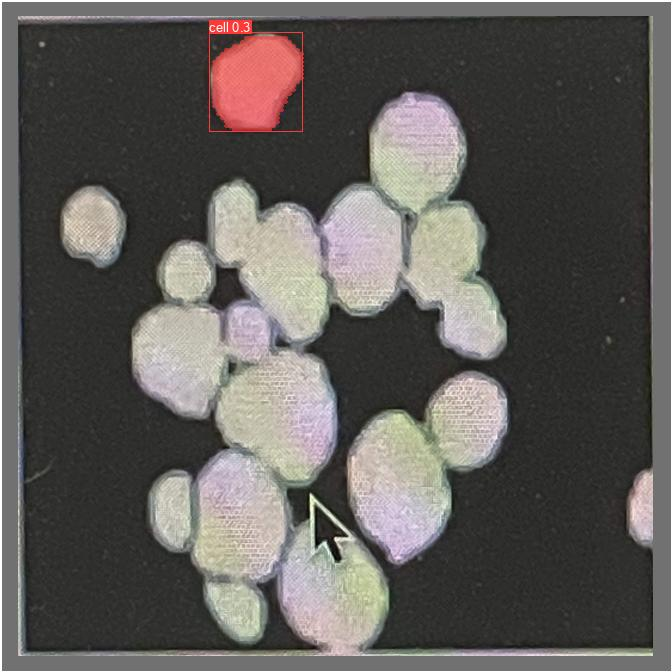

In [ ]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2023-08-31 11:09:54.261641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 11:09:55.158422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8-seg/celldata/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.38it/s]
                   all          1         14      0.556      0.539      0.631    

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolov8-seg/celldata/test/images save=true

2023-08-31 11:18:15.875179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 11:18:16.747831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/yolov8-seg/celldata/test/images/IMG_0368_jpg.rf.47659fa4dd39a7ed212a84a26fe13a02.jpg: 640x640 7 cells, 21.0ms
Speed: 0.9ms pre-process, 21.0ms inference, 155.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


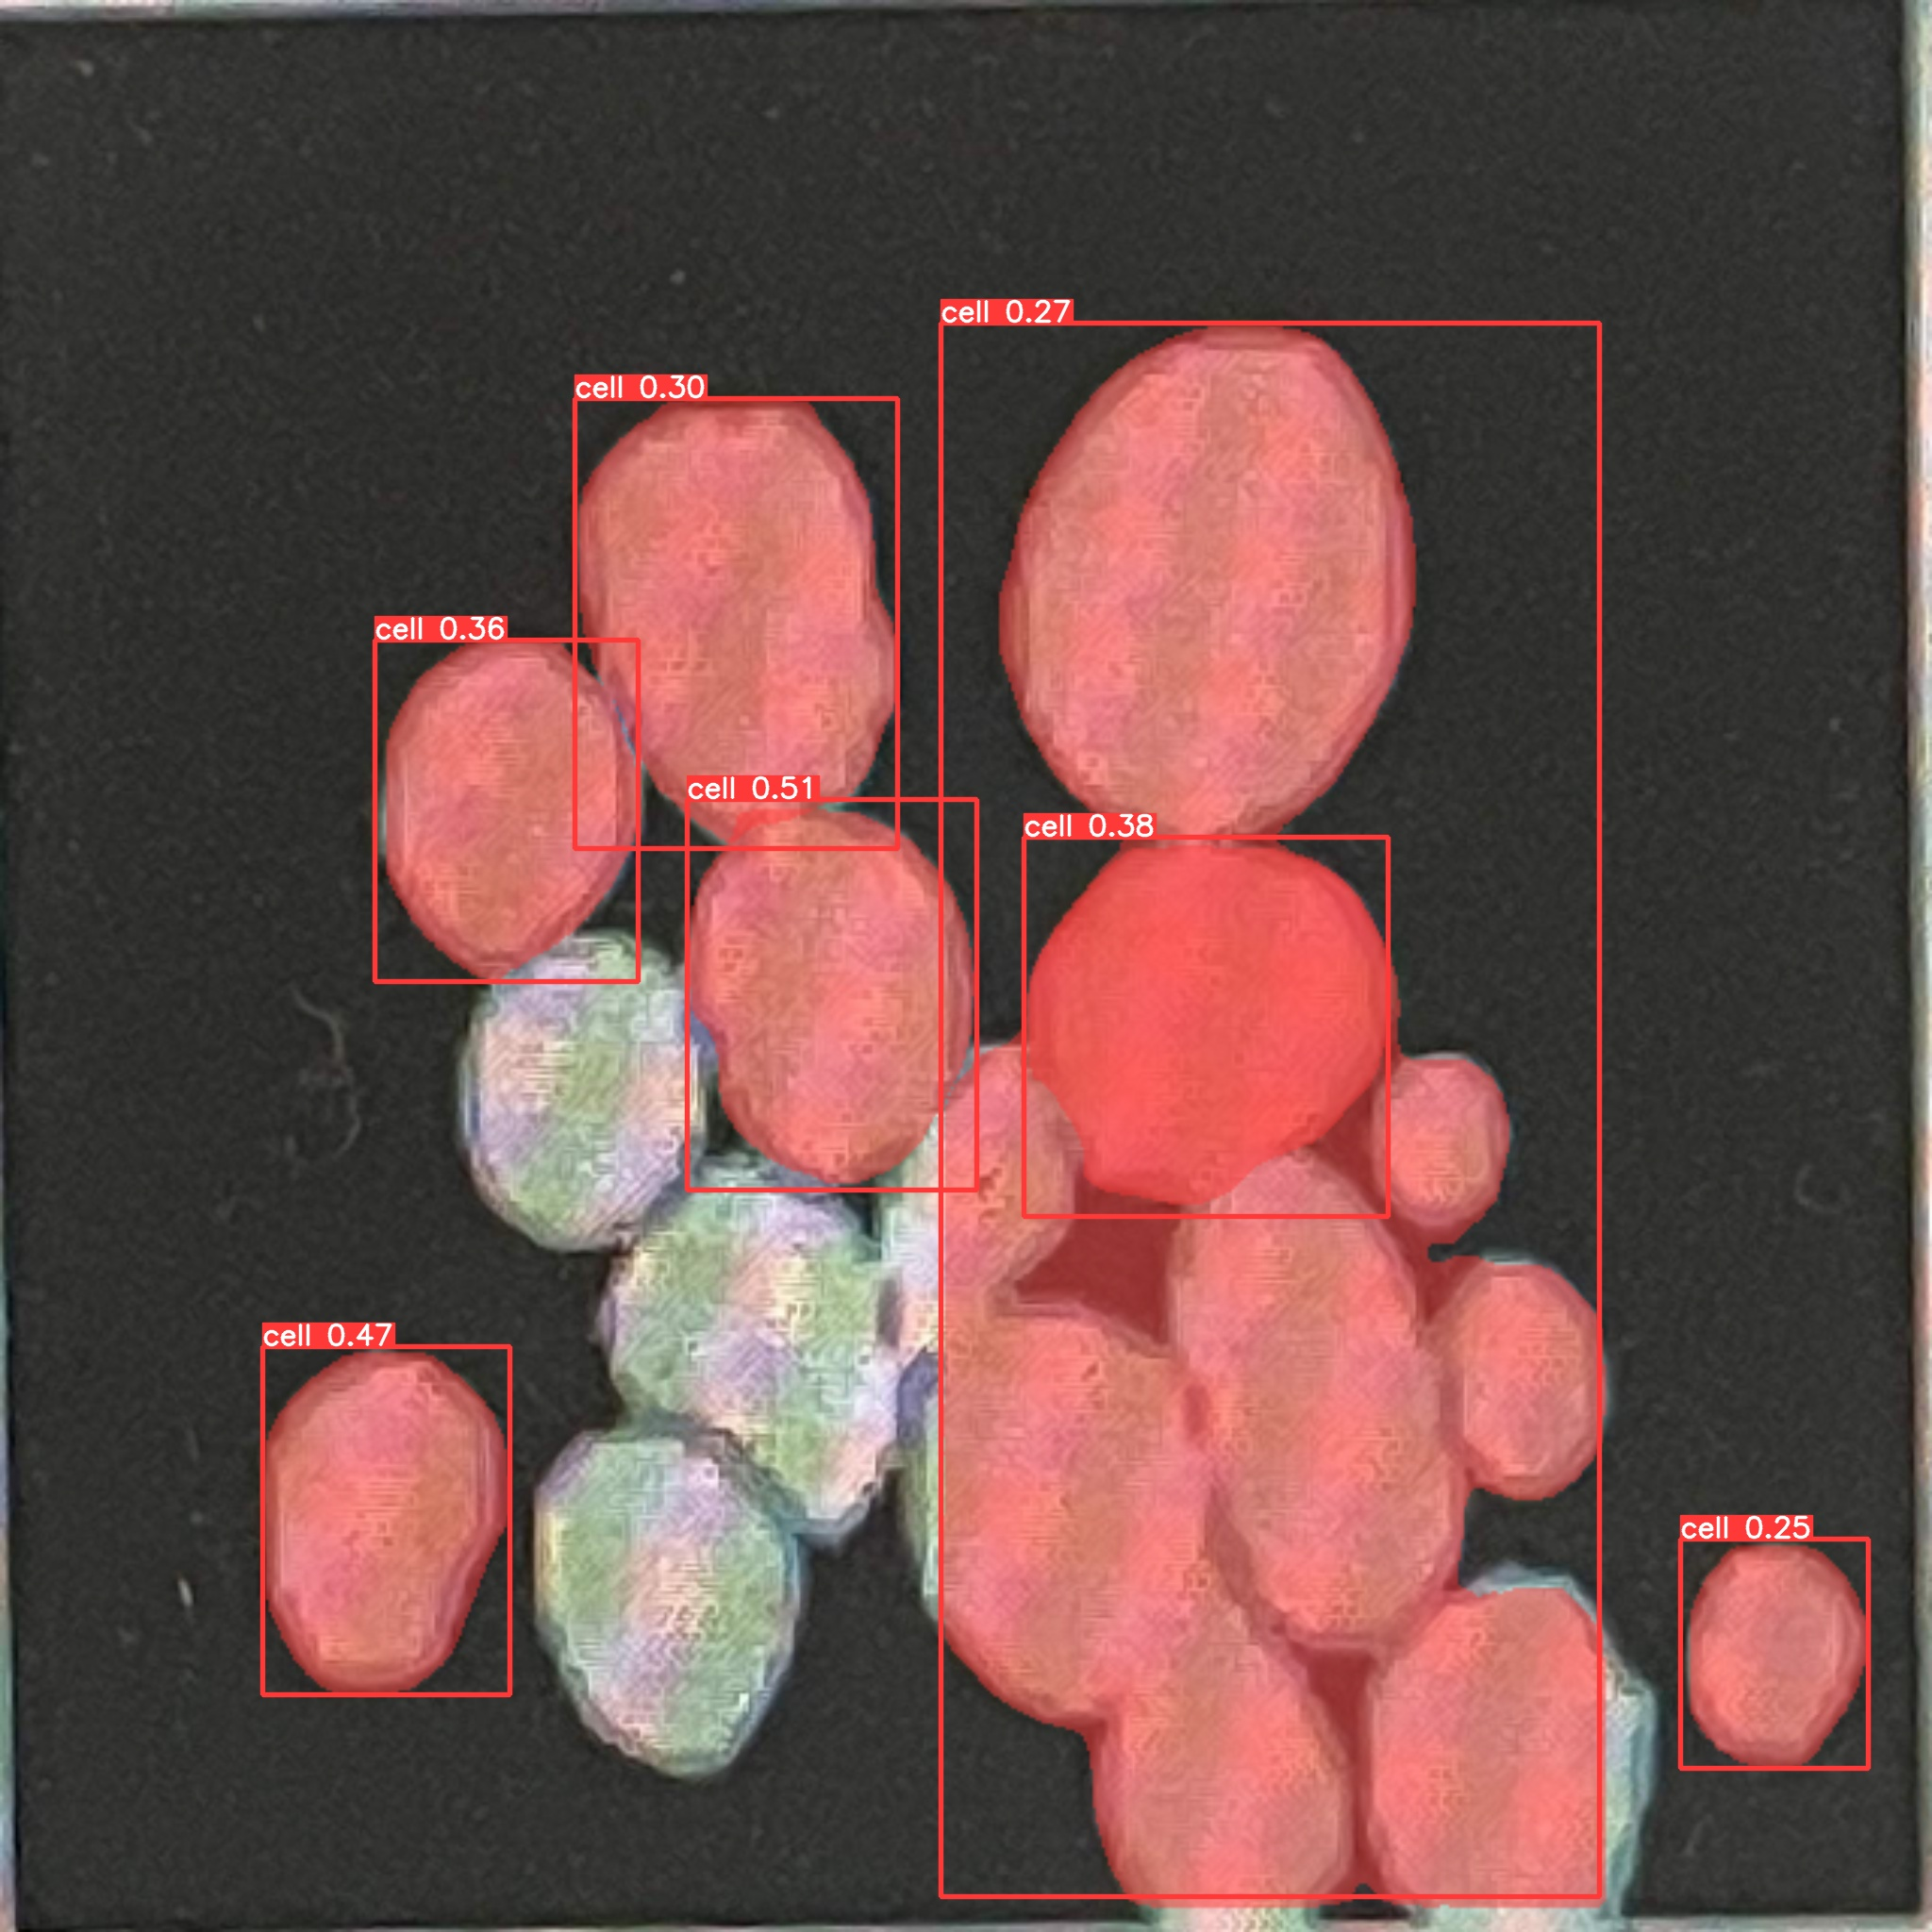

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")